In [169]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import datetime as dt

In [170]:
tickers = ['MSFT']

prices = yf.download(tickers,start='2020-01-01', end='2025-01-01')['Close']

returns = prices.pct_change().dropna()
returns.head()

C:\Users\samue\AppData\Local\Temp\ipykernel_19020\2219046847.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  prices = yf.download(tickers,start='2020-01-01', end='2025-01-01')['Close']
[*********************100%***********************]  1 of 1 completed

Ticker,MSFT
Date,
2020-01-03,-0.012452
2020-01-06,0.002584
2020-01-07,-0.009118
2020-01-08,0.015928
2020-01-09,0.012493


In [171]:
# Rendimiento promedio diario
mu = returns.mean()
mu * 100

Ticker
MSFT    0.098782
dtype: float64

In [172]:
# Rendimiento anual promedio
((1 + mu)**252 - 1) * 100

Ticker
MSFT    28.249576
dtype: float64

In [173]:
# Volatilidad diaria
vol = returns.std()
vol * 100

Ticker
MSFT    1.921144
dtype: float64

In [174]:
# Volatilidad anual
vol * np.sqrt(252) * 100

Ticker
MSFT    30.497209
dtype: float64

In [175]:
def get_data(ticker, start, end):
    data = yf.download(ticker, start=start, end=end, progress=False)['Close']
    returns = data.pct_change().dropna()
    mu = returns.mean()
    sigma = returns.std()
    return data, mu, sigma

In [176]:
data, mu, sigma = get_data('MSFT', '2020-01-01', '2025-01-01')
mu * 100, sigma * 100

C:\Users\samue\AppData\Local\Temp\ipykernel_19020\281825744.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start, end=end, progress=False)['Close']


(Ticker
 MSFT    0.098782
 dtype: float64,
 Ticker
 MSFT    1.921144
 dtype: float64)

In [177]:
# Obtener rendimientos y precios simulados
Z = np.random.normal(0, 1, 1000)
simulated_returns = np.array(mu) + np.array(sigma) * Z

# Rendimientos del activo modelados como mu + sigma * Z
# Z es una normal estándar

In [178]:
cumulative_returns = (1 + simulated_returns).cumprod()

In [179]:
initial_price = np.array(prices.iloc[-1])
initial_price

array([419.19656372])

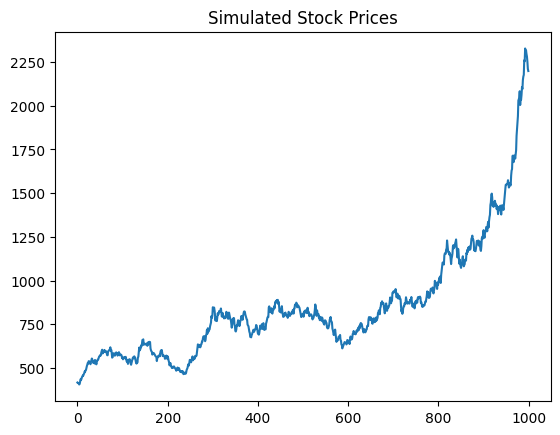

In [180]:
simulated_prices = initial_price * cumulative_returns

plt.plot(simulated_prices)
plt.title('Simulated Stock Prices')
plt.show()